In [3]:
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from pylab import *


import numpy as np
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def graficar_barras_annotation(splot):
    
    """ Devuelve un gráfico de barras con anotaciones cuando las barras son  muy dispares y se necesita 
    en algunas barras las anotaciones estén por dentro y otras que estén por fuera"""
    
    values = []
    for p in splot.patches:

        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        values.append(y) 
        y_max = max(values)


    cut_off = 0.80*y_max

    for p in splot.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        if y > cut_off:
            splot.annotate(format(round(p.get_height())),
                       (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                           va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white')

        elif y< cut_off: 
            splot.annotate(format(round(p.get_height())),
                       (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                           va = 'center', xytext = (0, 10), textcoords = 'offset points', color='black')

In [5]:
def graficos_plain(lista_df, columna_x, lista_seleccion, ancho=20,  alto=10, columna_y = '', title='',
                  color_code=0):
    
    # purpose is to define a function that can plot multiple charts
    # as most likely will be time series, we use the same column for x axis
    # and multiple columns in seleccion
    
    # Create the chart.
    fig, ax = plt.subplots(figsize=(ancho, alto))
    
    # Set the title
    ax.set_title(title, fontsize=30)
    
    # Set the background color, never plain white.
    ax.set_facecolor('#F7FAFC')
    # And add colors, preferibly non-saturated.
    colores = ['orange', 'navy', 'tomato', 'crimson', 'darkgreen', 'brown',
               'forestgreen', 'steelblue', 'deeppink', 
               'darkorange', 'palegreen', 'gold', 'darkviolet', ]

    # We will use listas to plot multiple data in one chart, for comparable reasons.
    # j is simply for color coding.
    listas, j, leyenda = [], color_code, []

    for i in range(len(lista_df)):
        df = lista_df[i]
        seleccion = lista_seleccion[i]
        for columna_in_seleccion in seleccion:
            x1 = df[columna_x]
            y1 = df[columna_in_seleccion]
            listas.append(((x1, y1), colores[j])) # Creating a listas item to be shown in the plot.
            leyenda.append(columna_in_seleccion)
            # Start over if we have more series than color.
            if j == len(colores)-1:
                j=0
            else:
                j+=1

    # Just plot the series.
    for lista in listas:
        ax.plot(*lista[0], color=lista[1])

    # And all features in the chart.
    plt.legend(leyenda, bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xlabel(columna_x, fontsize=15)
    plt.ylabel(columna_y, fontsize=15)
    plt.show()

In [6]:
df_traffic = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [7]:
df_traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


# Data Analysis

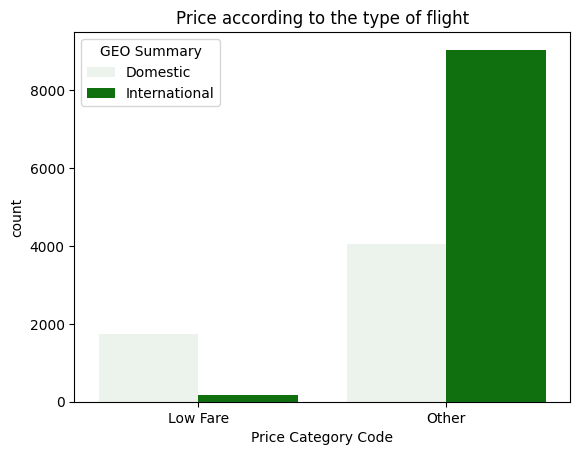

In [8]:
sns.countplot(x=df_traffic['Price Category Code'], hue=df_traffic['GEO Summary'], color='green')
#  graficar_barras_annotation(splot)

plt.title('Price according to the type of flight')
plt.show()

Domestic flighs tend to have lower price thant internationals

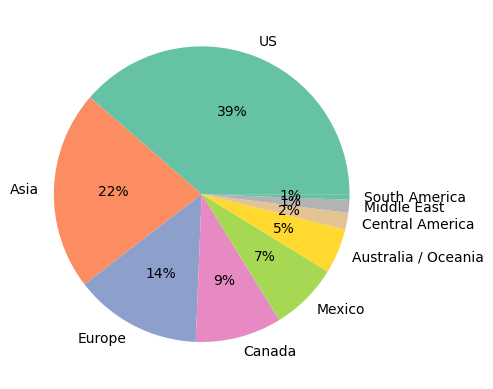

In [8]:
data = df_traffic['GEO Region'].value_counts().values
labels = df_traffic['GEO Region'].value_counts(normalize=True).index
colors = sns.color_palette('Set2')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.show()

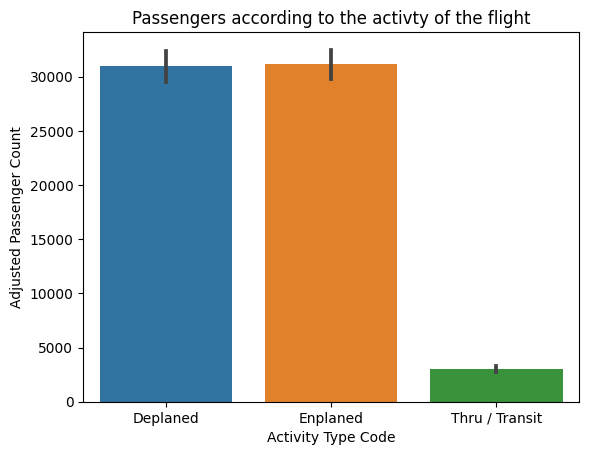

In [9]:
sns.barplot(x=df_traffic['Activity Type Code'], y=df_traffic['Adjusted Passenger Count'])
#  graficar_barras_annotation(splot)

plt.title('Passengers according to the activty of the flight')
plt.show()

It's seems that each row is an isolate airplane. 

# Trend

In [9]:
format='%Y%m'
df_traffic['Activity Period Datetime'] = pd.to_datetime(df_traffic['Activity Period'], format=format)

In [10]:
df_grouped = df_traffic.groupby('Activity Period Datetime')['Adjusted Passenger Count'].sum()
y = df_grouped.resample('MS').mean()


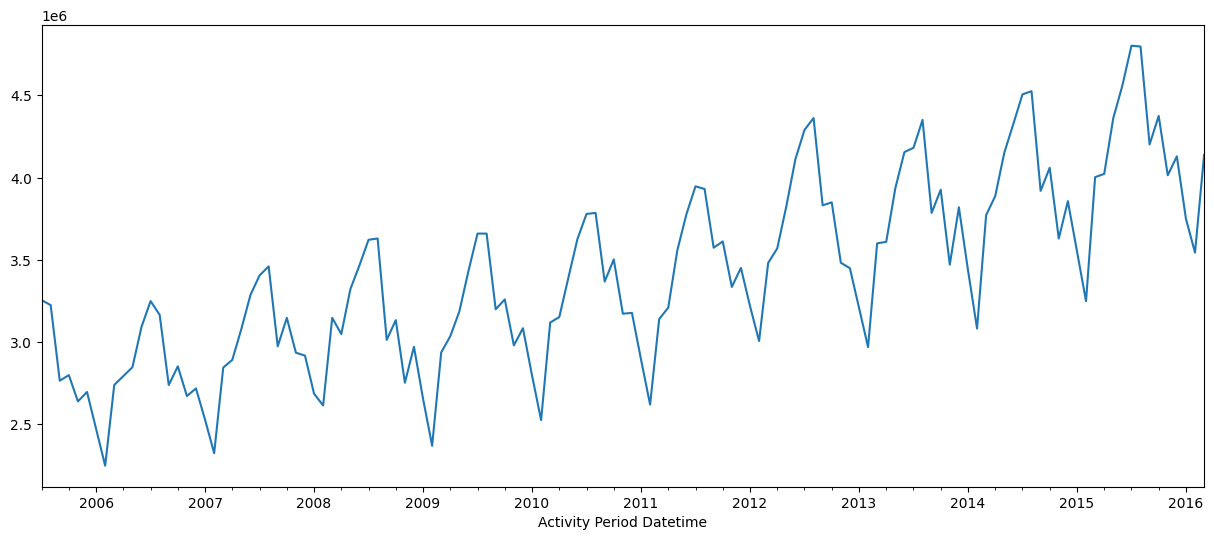

In [12]:
y.plot(figsize=(15, 6))
plt.show()

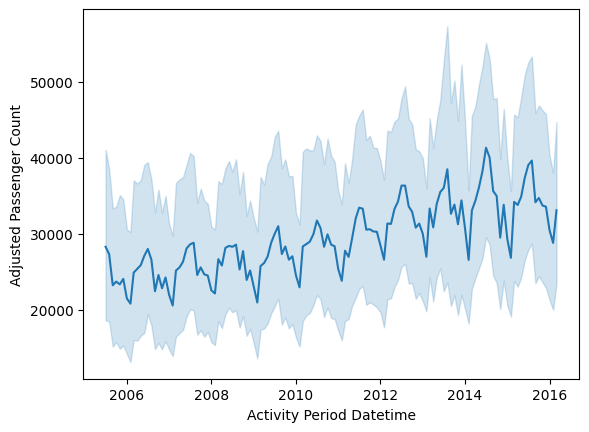

In [13]:
sns.lineplot(x=df_traffic['Activity Period Datetime'], y=df_traffic['Adjusted Passenger Count']
             )
plt.show()

# Model

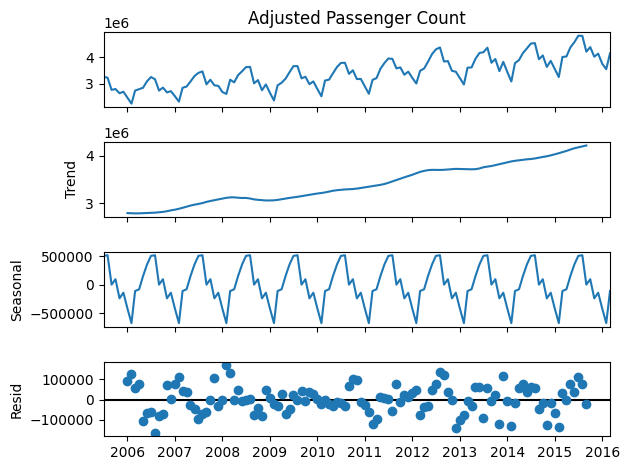

In [14]:

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Linear regression

In [15]:
df_traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Activity Period Datetime
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,2005-07-01
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,2005-07-01
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,2005-07-01
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,2005-07-01
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,2005-07-01


In [16]:
y = y.reset_index().rename(columns={'Activity Period Datetime':'Date', 'Adjusted Passenger Count':'passengers'}) 
# Usaremos el y para entrenamiento que ya está sampleado y correctamente imputado

In [17]:
dfg_linear = y.copy()

dfg_linear['Time'] = (dfg_linear['Date'] - dfg_linear['Date'].min()) / np.timedelta64(4, 'W')

Y = dfg_linear['passengers']
X = dfg_linear['Time']
X = add_constant(X) # add intercept 
modelo = OLS(Y, X)
resultados = modelo.fit()

In [142]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:             passengers   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           2.73e-26
Time:                        17:36:37   Log-Likelihood:                -1833.2
No. Observations:                 129   AIC:                             3670.
Df Residuals:                     127   BIC:                             3676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.673e+06   6.34e+04     42.165      0.0

In [149]:
dfg_linear['passengers_'] = resultados.predict(X) # Predicciones tomadas del conjunto de entrenamiento

In [167]:
# Predicciones sobre nueva data
dfg_predict = pd.DataFrame(data={
    'Date': pd.date_range('2016-03-01', periods=45, freq='M')+pd.DateOffset(days=1),
    'passengers': np.nan,
                                    })
dfg_predict['Time'] = (dfg_predict['Date'] - dfg_predict['Date'].min()) / np.timedelta64(4, 'W')
dfg_predict['passengers_'] = resultados.predict(add_constant(dfg_predict['Time']))

In [168]:
dfg_predict.head()

,Date,passengers,Time,passengers_
0,2016-04-01,NaN,0.000000,2.672916e+06
1,2016-05-01,NaN,1.071429,2.684299e+06
2,2016-06-01,NaN,2.178571,2.696062e+06
3,2016-07-01,NaN,3.250000,2.707446e+06
4,2016-08-01,NaN,4.357143,2.719209e+06


In [173]:
dfg_predict = pd.DataFrame(data={
    'Date': pd.date_range('2016-03-01', periods=45, freq='M')+pd.DateOffset(days=1),
    'passengers': np.nan,
                                    })
dfg_predict['Time'] = (dfg_predict['Date'] - dfg_linear['Date'].min()) / np.timedelta64(4, 'W') # Substraer dfg_linear['Date'].min()  Sigue el mínimo del período entero para la tendencia??
dfg_predict['passengers_'] = resultados.predict(add_constant(dfg_predict['Time']))

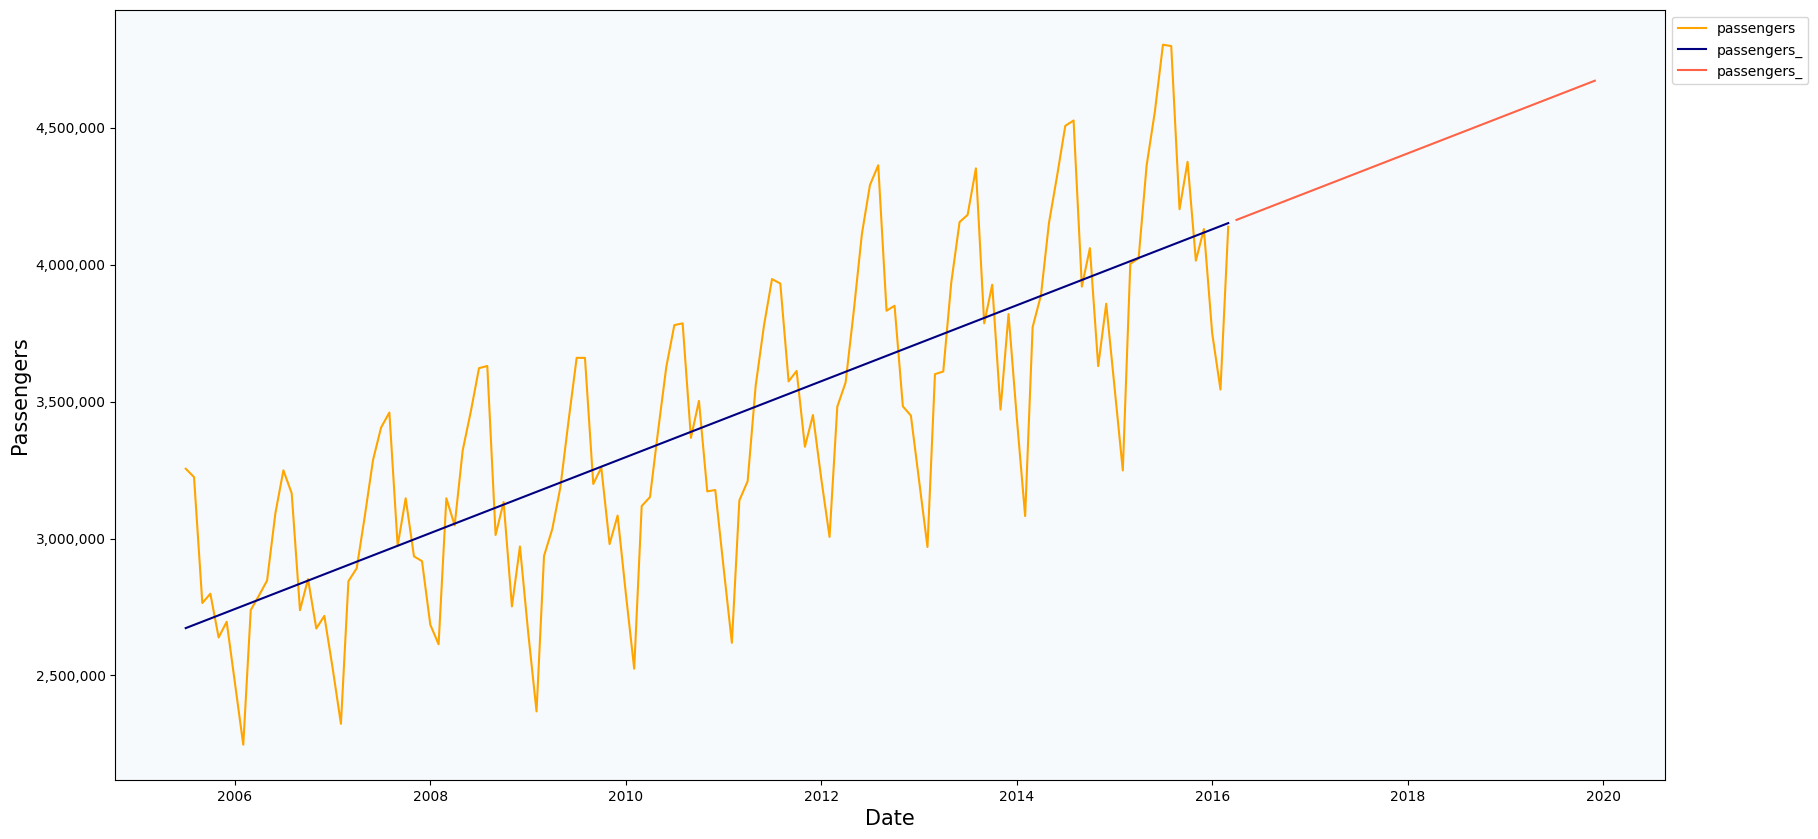

In [174]:
graficos_plain([dfg_linear, dfg_predict], 'Date', \
               [['passengers', 'passengers_'], ['passengers_']], columna_y='Passengers')

Source: 
* https://www.kaggle.com/code/chemaplana/the-accountant-playing-with-earosumisu/notebook#All-Passengers 
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

# Lasso regression

In [12]:
from sklearn.linear_model import Lasso

reg = Lasso()
reg.fit(X, Y)

Lasso()

In [13]:
print(reg.score(X, Y))


0.5890770891022027


Ver de agregar Lasso Regression (permite hacer un feature selection,. Ver cómo adaptarlo a forecasting)  
https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_23_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-0-23-0-py

Tal vez es esto lo que yo quiero:   
https://towardsdatascience.com/expand-your-time-series-arsenal-with-these-models-10c807d37558

Calcular seasonality ? https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

Y ver forma de introducir otras características que identifiquen el período, por ejemplo, elecciones? fin de semana largo? low cost?

Adicionar hiperparámetros y logear con mlflow

# ARIMA model

In [1]:
import itertools

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
y = df_grouped.resample('MS').mean()

y_train = y[:'2014-01-01']
y_test = y['2014-02-01':]

In [53]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
    

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3352.5321804007
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2907.8293593260905
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2443.4420874276084
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2125.657138720984
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2413.8929141829176
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2386.8203921593417
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2148.008407376065
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2101.9215145716607
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3249.9015033518394
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2849.732815058806
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2378.4850769142613
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2057.4681918206156
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2903.9182667636924
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2842.1841064567348
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2111.1086595082224
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2052.4730155534
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2822.3555676464284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2442.288023231456
AR

In [54]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1696      0.328     -0.517      0.605      -0.812       0.473
ma.L1         -0.2763      0.286     -0.966      0.334      -0.837       0.284
ar.S.L12      -0.4983      0.164     -3.037      0.002      -0.820      -0.177
ma.S.L12      -0.0386      0.137     -0.282      0.778      -0.307       0.230
sigma2      8.606e+09   1.79e-11    4.8e+20      0.000    8.61e+09    8.61e+09


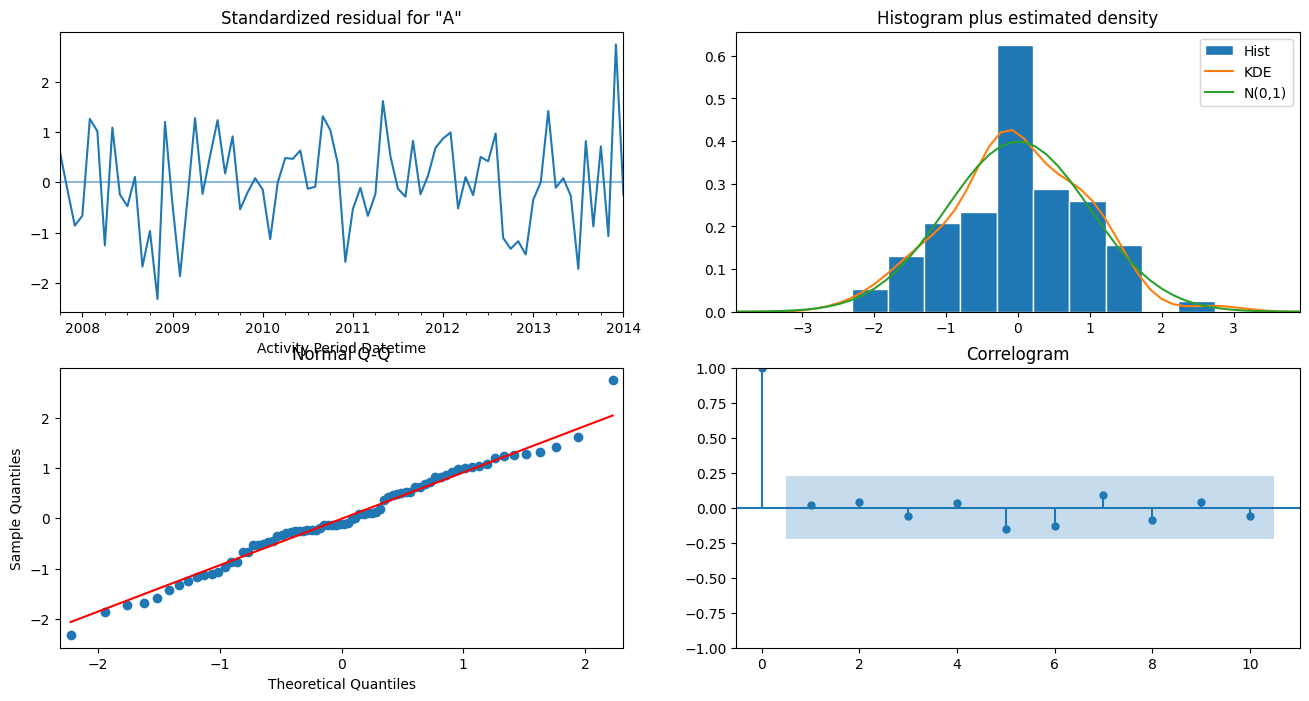

In [55]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

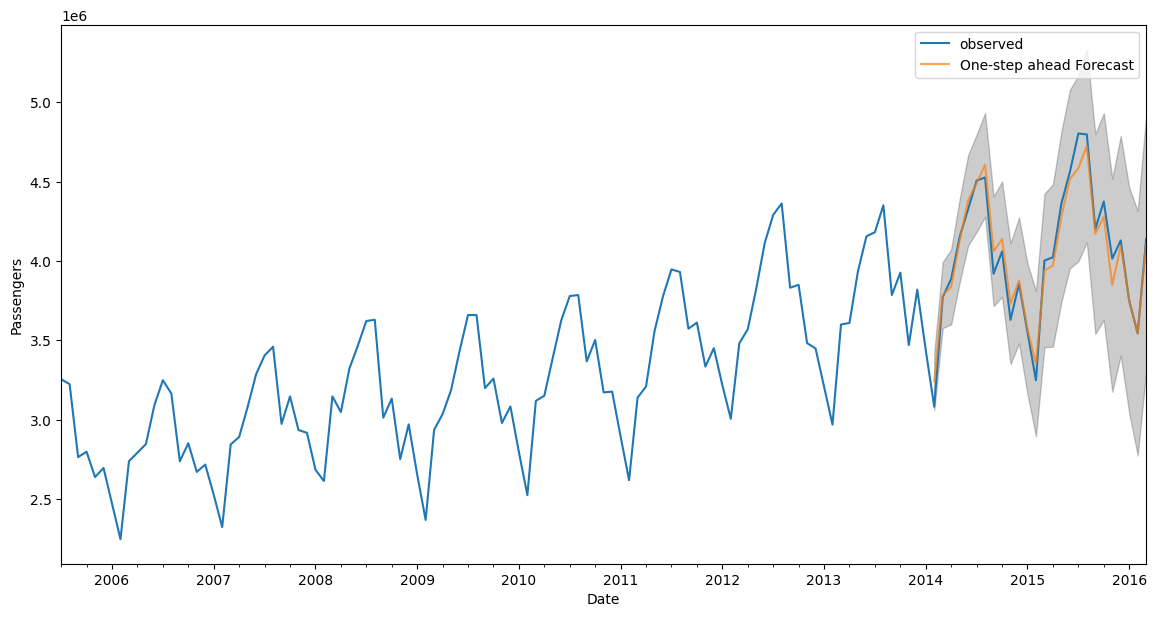

In [70]:
#pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred = results.get_prediction(start=y_test.index.min(), end=y_test.index.max())
pred_ci = pred.conf_int()
ax = y['2005':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

# Multiple variable approach

In [1]:
import skforecast

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


c:\Users\Usuario\.conda\envs\flights\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exogenous variables

In [11]:
df_traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Activity Period Datetime
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,2005-07-01
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,2005-07-01
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,2005-07-01
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,2005-07-01
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,2005-07-01


In [12]:
df_selected = df_traffic[['Activity Period Datetime','Adjusted Passenger Count', 'Price Category Code']]

In [21]:
df_dumm = pd.get_dummies(df_selected, columns=['Price Category Code'], dtype='int64')

In [22]:
df_dumm.head()

,Activity Period Datetime,Adjusted Passenger Count,Price Category Code_Low Fare,Price Category Code_Other
0,2005-07-01,27271,1,0
1,2005-07-01,29131,1,0
2,2005-07-01,10830,1,0
3,2005-07-01,35156,0,1
4,2005-07-01,34090,0,1


In [51]:
df_grouped2 = df_dumm.groupby('Activity Period Datetime')[['Adjusted Passenger Count','Price Category Code_Low Fare']].sum()
y2 = df_grouped2.resample('MS')[['Adjusted Passenger Count','Price Category Code_Low Fare']].mean()

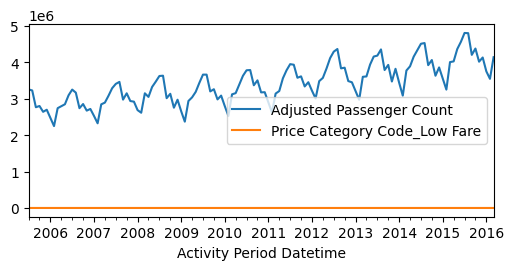

In [53]:
fig, ax = plt.subplots(figsize=(6, 2.5))
y2.plot(ax=ax, label='y')
#df_grouped2['Price Category Code_Low Fare'].plot(ax=ax, label='exogenous variable')
ax.legend()

In [54]:
steps = 36
data_train = y2[:-steps]
data_test  = y2[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2005-07-01 00:00:00 --- 2013-03-01 00:00:00  (n=93)
Test dates  : 2013-04-01 00:00:00 --- 2016-03-01 00:00:00  (n=36)


In [55]:
data_train.head()

,Adjusted Passenger Count,Price Category Code_Low Fare
Activity Period Datetime,,
2005-07-01,3254797.0,15.0
2005-08-01,3224118.0,15.0
2005-09-01,2764519.0,17.0
2005-10-01,2798480.0,17.0
2005-11-01,2638631.0,19.0


In [56]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 8
             )

forecaster.fit(y=data_train['Adjusted Passenger Count'], exog=data_train['Price Category Code_Low Fare'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7 8] 
Transformer for y: None 
Transformer for exog: None 
Window size: 8 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: Price Category Code_Low Fare 
Training range: [Timestamp('2005-07-01 00:00:00'), Timestamp('2013-03-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-09-20 17:43:19 
Last fit date: 2023-09

# Predictions

In [57]:
predictions = forecaster.predict(steps=steps, exog=data_test['Price Category Code_Low Fare'])


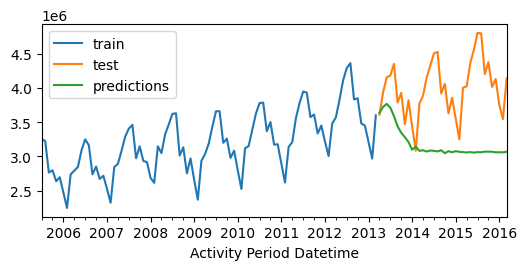

In [58]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['Adjusted Passenger Count'].plot(ax=ax, label='train')
data_test['Adjusted Passenger Count'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

Tal vez porque es una variable dicotómica?

In [59]:
error_mse = mean_squared_error(
                y_true = data_test['Adjusted Passenger Count'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 876279210043.852


# Hiperparameter tuning

In [60]:
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

lags_grid = [5, 12, 20]

param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                    forecaster  = forecaster,
                    y           = data_train['Adjusted Passenger Count'],
                    exog        = data_train['Price Category Code_Low Fare'],
                    param_grid  = param_grid,
                    lags_grid   = lags_grid,
                    steps       = steps,
                    refit       = False,
                    metric      = 'mean_squared_error',
                    initial_train_size = int(len(data_train)*0.5),
                    return_best = True,
                    n_jobs      = 'auto',
                    verbose     = False
               )

Number of models compared: 27.


lags grid: 100%|██████████| 3/3 [00:10<00:00,  3.56s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'max_depth': 3, 'n_estimators': 50}
  Backtesting metric: 77806516186.71165



Por qué está tan alto ese backtesting??

In [61]:
results_grid.head()


,lags,params,mean_squared_error,max_depth,n_estimators
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 3, 'n_estimators': 50}",7.780652e+10,3,50
15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 10, 'n_estimators': 50}",7.888862e+10,10,50
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 5, 'n_estimators': 50}",8.059472e+10,5,50
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 3, 'n_estimators': 100}",8.828952e+10,3,100
16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 10, 'n_estimators': 100}",8.882331e+10,10,100


Hiperparámetros a loggear con mlflow

# Final model

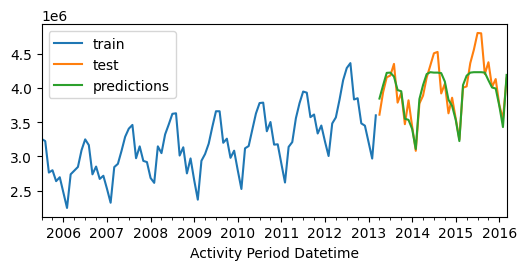

In [62]:
# Predictions
predictions = forecaster.predict(steps=steps, exog=data_test['Price Category Code_Low Fare'])

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['Adjusted Passenger Count'].plot(ax=ax, label='train')
data_test['Adjusted Passenger Count'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

Source:
* https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

Tareas:
* Ver forma de preprocesar mejor las variables dicotómicas, tal vez escalarlas antes???
* Revisar tema de autocorrelación entre variables predictoras, cómo afecta al modelo
* Qué hace skforecast??